#**ENVIRONMENTAL MONITORING AND MANAGEMENT**

##TITLE: INTEGRATING ENVIRONMENTAL VARIABLES WITH LoRaWAN SIGNAL METRICS: A COMPREHENSIVE ANALYSIS OF THE VINEYARD 2021 DATASET







###SUJECT COORDINATOR: EMANUELE GOLDONI
###AUTHOR: SUBHRAJYOTI SEN GUPTA
###MATRICULATION NUMBER: 898072
###EMAIL: s.sengupta1@campus.unimib.it

##ABSTRACT:

In this project we are going to consider the **environmental conditions that are integrated with LoRaWAN signal analysis**. Considering the public dataset available as "**Vineyard 2021**" which is an analysis done for a period of 85 days with **multiple LoRaWAN nodes** placed across 12 sqkm. It records about **RSSI(Received Signal Strength Indicator), signal to noise ratio (SNR), global positioning system (GPS) information, along with temperature, humidity and pressure data**. The motivation of our project is to **analyse any statical pattern** that can be drawn out which can futhur be implemented for industrial as well as academic research task(AI tasks).


##INTRODUCTION:

Installing supporting libraries.

In [ ]:
!pip install folium

Calling required libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Integrating the google drive from which we can access our dataset.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


### SENSOR DATASET:

The **sensor dataset** describes the **radio channel information collected by the LORAWAN gateway**.
The size of the recording is of 190503 records over a span of 3 months.

The rows have values like id, nodeid, timestamp, battery, frequency, data_rate, coding_rate, gtw_id, gtw_channel, gtw_rssi, gtw_snr,
soil_temp, soil_hum.

1. *id*: for row identification.
2. *nodeid*: transmitted sensor node indentifier.
3. *timestamp*: Unix timestamp of the transmission, expressed in number of seconds.
4. *battery*: battery percentage.
5. *frequency*: transmitting frequency in MHz.
6. *data_rate*: LoRa transmitting bandwidth (BW) in KHz and spreading factory (SF).
7. *coding_rate*: the rate of coding for LORA.
8. *gtw_id*: unique identifier of the receiving gateway.
9. *gtw_channel*: channel used by the gateway.
10. *gtw_rssi*: RSSI measured by the gateway in dBm.
11. *gtw_snr*: SNR measured by the gateway in dB.
12. *soil_temp*: soil temperature measured by the node in °C.
13. *soil_hum*: soil moisture measured by the node in %.

So our first step will be to **decleare the path of the dataset** in the drive and load it in **resprestation of a data frame** which can done by the *pd.read_csv()*.

In [ ]:
sensor_data_path='/content/drive/MyDrive/Colab Notebooks/EMM project/sensors_data.csv'
sensor_data=pd.read_csv(sensor_data_path, sep=';')
sensor_data.head()

,id,nodeid,timestamp,battery,frequency,data_rate,coding_rate,gtw_id,gtw_channel,gtw_rssi,gtw_snr,soil_temp,soil_hum
0,1,tinovi-06,1605522681,96,868.1,SF7BW125,4/5,eui-3133303739005600,0,-64,9.50,12.09,17.66
1,2,tinovi-03,1605522697,99,868.1,SF7BW125,4/5,eui-3133303739005600,0,-71,8.75,12.11,28.62
2,3,tinovi-05,1605522723,107,868.1,SF7BW125,4/5,eui-3133303739005600,0,-73,8.75,12.58,22.24
3,4,tinovi-02,1605522759,109,868.3,SF7BW125,4/5,eui-3133303739005600,1,-74,9.25,11.81,61.62
4,5,tinovi-07,1605522764,100,868.1,SF7BW125,4/5,eui-3133303739005600,0,-65,8.75,12.14,45.75


Now let's start with **basic operation** on this data. Finding **min, max, average, standard deviation, first quartile(25%), second quartile(median) and third quartile(75%)**. For getting the statisctis we are going to use *describe()* function.

In [ ]:
sensor_data.describe()

,id,timestamp,battery,frequency,gtw_channel,gtw_rssi,gtw_snr,soil_temp,soil_hum
count,190503.000000,1.905030e+05,190503.000000,190503.000000,190503.000000,190503.000000,190503.000000,190502.000000,190502.000000
mean,95252.000000,1.609234e+09,95.060582,867.800127,3.500071,-69.988252,8.651341,5.184519,76.192406
std,54993.623503,2.107575e+06,5.593021,0.458340,2.290933,9.804436,1.101981,2.428138,17.401057
min,1.000000,1.605523e+09,82.000000,867.100000,0.000000,-108.000000,-9.000000,0.460000,1.110000
25%,47626.500000,1.607419e+09,91.000000,867.400000,2.000000,-78.000000,7.750000,3.310000,68.420000
50%,95252.000000,1.609234e+09,95.000000,867.900000,3.000000,-69.000000,9.000000,5.130000,77.030000
75%,142877.500000,1.611063e+09,99.000000,868.300000,5.000000,-62.000000,9.500000,6.740000,90.640000
max,190503.000000,1.612879e+09,144.000000,868.500000,7.000000,-45.000000,11.750000,22.650000,97.180000


To find the **most frequent value** what we can use is *mode()* function which will give the most frequent value for **all the columns** present in the dataset. The following code will guide us throught it.

In [ ]:
column_modes = sensor_data.mode().iloc[0]
result = pd.DataFrame({'Column': column_modes.index, 'Most Frequent Value': column_modes.values})
print("Most frequent values for each column:")
print(result)

Most frequent values for each column:
         Column   Most Frequent Value
0            id                     1
1        nodeid             tinovi-04
2     timestamp          1605775095.0
3       battery                  96.0
4     frequency                 868.5
5     data_rate              SF7BW125
6   coding_rate                   4/5
7        gtw_id  eui-3133303739005600
8   gtw_channel                   2.0
9      gtw_rssi                 -62.0
10      gtw_snr                  9.25
11    soil_temp                  4.71
12     soil_hum                 71.62


### WEATHER DATASET:

The **Weather dataset** describe the **environmental values collected by the weather station and collected on the end point computer using a custom protocol**.

The rows have values of timestamp, temperature, humidity, pressure in the atmosphere and precipitation.

1. *Timestamp*: Unix timestamp of the acquisition, expressed in number of seconds since January 1, 1970, midnight GMT.
2. *Temp*: outdoor temperature in
°C.
3. *Hum*: outdoor relative humidity in %.
4. *Bar*: barometric pressure in hPa.
5. *Rain*: rain in mm.

So our first step will be to **decleare the path of the dataset** in the drive and **load it in resprestation of a data frame** which can done by the *pd.read_csv()*.

In [ ]:
weather_data_path='/content/drive/MyDrive/Colab Notebooks/EMM project/weather_data.csv'
weather_data=pd.read_csv(weather_data_path, sep=';')
weather_data.head()

,Timestamp,Temp,Hum,Bar,Rain
0,1605049800,9.0,76,1026.2,0.0
1,1605050400,8.8,76,1026.2,0.0
2,1605051000,8.8,76,1026.1,0.0
3,1605051600,8.7,76,1026.0,0.0
4,1605052200,8.6,76,1026.0,0.0


Now let's start with **basic operation** on this data. **Finding min, max, average, standard deviation, first quartile(25%), second quartile(median) and third quartile(75%)**. For getting the statisctis we are going to use *describe()* function.

In [ ]:
weather_data.describe()

,Timestamp,Temp,Hum,Bar,Rain
count,1.638000e+04,16380.000000,16380.000000,16380.000000,16380.000000
mean,1.609975e+09,5.581374,70.926313,1017.380537,0.020917
std,2.851819e+06,4.119443,19.824756,11.310715,0.121213
min,1.605050e+09,-5.300000,1.000000,985.200000,0.000000
25%,1.607507e+09,2.600000,69.000000,1009.000000,0.000000
50%,1.609964e+09,5.400000,79.000000,1018.900000,0.000000
75%,1.612464e+09,8.300000,83.000000,1025.900000,0.000000
max,1.614920e+09,20.800000,87.000000,1040.400000,4.830000


To find the **most frequent value** what we can use is *mode()* function which will give the most frequent value for **all the columns** present in the dataset. The following code will guide us throught it.

In [ ]:
column_modes = weather_data.mode().iloc[0]
result = pd.DataFrame({'Column': column_modes.index, 'Most Frequent Value': column_modes.values})
print("Most frequent values for each column:")
print(result)

Most frequent values for each column:
      Column  Most Frequent Value
0  Timestamp         1.605050e+09
1       Temp         8.300000e+00
2        Hum         8.400000e+01
3        Bar         1.025600e+03
4       Rain         0.000000e+00


### COMBINED DATASET:

The **combined dataset** is a combination of the **timestamp, temperature, humidity, pressure, rain, RSSI(Received Signal Strength Indicator) signals and the SNR(Signal to Noise Ratio)**. There are 2029 rows and 21 columns of data.

For RSSI and SNR we have **different nodes all together 8** of them.

1. *Timestamp:* Unix timestamp of the acquisition, expressed in number of seconds since January 1, 1970, midnight GMT.
2. *Temp:* outdoor temperature in °C.
3. *Hum:* outdoor relative humidity in %.
4. *Bar:* barometric pressure in hPa.
5. *Rain:* rain in mm.
6. *RSSI nodes(1-8):* It tells how well a device can listen to the signal from the access point.
7. *SNR(1-8):* measures the level of a desired signal to the level of background noise.

So our first step will be to **decleare the path of the dataset** in the drive and load it in resprestation of a data frame which can done by the pd.read_csv().

In [ ]:
combined_data_path='/content/drive/MyDrive/Colab Notebooks/EMM project/combined_hourly_data.csv'
combined_hourly_data=pd.read_csv(combined_data_path, sep=';')
combined_hourly_data

,timestamp,temp,hum,bar,rain,RSSI_01,RSSI_02,RSSI_03,RSSI_04,RSSI_05,...,RSSI_07,RSSI_08,SNR_01,SNR_02,SNR_03,SNR_04,SNR_05,SNR_06,SNR_07,SNR_08
0,1605520800,10.550000,77.333333,1018.083333,0.25,-56.333333,-73.333333,-67.166667,-76.200000,-71.666667,...,-64.000000,NaN,8.875000,8.125000,8.041667,8.350000,8.458333,8.541667,7.950000,NaN
1,1605524400,10.716667,77.000000,1017.416667,0.00,-56.700000,-74.416667,-68.250000,-77.833333,-71.833333,...,-64.000000,NaN,8.900000,8.979167,8.770833,8.875000,8.937500,9.125000,9.041667,NaN
2,1605528000,11.216667,77.666667,1016.933333,0.00,-56.750000,-73.916667,-67.416667,-77.583333,-72.083333,...,-63.750000,NaN,9.104167,8.541667,8.354167,8.854167,8.479167,8.729167,8.500000,NaN
3,1605531600,11.700000,80.500000,1016.450000,0.00,-56.916667,-75.750000,-67.750000,-77.416667,-71.916667,...,-64.083333,NaN,9.000000,8.791667,8.729167,8.770833,8.812500,8.875000,8.791667,NaN
4,1605535200,12.016667,81.666667,1016.616667,0.00,-57.000000,-75.818182,-67.454545,-79.166667,-73.000000,...,-62.727273,NaN,9.145833,8.659091,8.431818,8.437500,8.625000,8.795455,8.068182,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,1612861200,8.483333,1.000000,1000.150000,0.00,-56.833333,-87.083333,-67.833333,-78.250000,-69.833333,...,-61.083333,-89.416667,9.166667,8.354167,8.437500,8.812500,8.645833,8.863636,8.416667,8.354167
2025,1612864800,8.983333,1.000000,1000.433333,0.00,-57.500000,-86.916667,-68.916667,-78.750000,-71.083333,...,-61.833333,-89.000000,8.812500,8.604167,8.854167,8.625000,9.145833,8.645833,8.625000,7.954545
2026,1612868400,9.350000,12.500000,1000.533333,0.00,-56.500000,-86.916667,-67.750000,-78.083333,-72.583333,...,-62.090909,-90.750000,9.083333,8.250000,8.625000,8.791667,8.666667,8.729167,8.613636,7.500000
2027,1612872000,9.616667,31.500000,1000.300000,0.00,-57.083333,-85.500000,-68.333333,-78.916667,-72.583333,...,-61.750000,-89.083333,9.125000,8.479167,8.833333,8.416667,9.145833,8.750000,8.604167,7.958333


Now let's start with **basic operation** on this data. Finding **min, max, average, standard deviation, first quartile(25%), second quartile(median) and third quartile(75%)**. For getting the statisctis we are going to use *describe()* function.

In [ ]:
combined_hourly_data.describe()

,timestamp,temp,hum,bar,rain,RSSI_01,RSSI_02,RSSI_03,RSSI_04,RSSI_05,...,RSSI_07,RSSI_08,SNR_01,SNR_02,SNR_03,SNR_04,SNR_05,SNR_06,SNR_07,SNR_08
count,2.029000e+03,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2028.000000,2028.000000,2028.000000,...,2029.000000,1879.000000,2029.000000,2029.000000,2028.000000,2028.000000,2028.000000,2028.000000,2029.000000,1879.000000
mean,1.609181e+09,4.570999,75.695088,1014.163967,0.160665,-55.877248,-80.777758,-67.326980,-77.367213,-71.173228,...,-61.810408,-83.225550,9.129450,8.620605,8.545065,8.658024,8.755928,8.819445,8.442576,8.204901
std,2.118979e+06,3.303357,14.711794,10.377709,0.714454,1.125597,3.644798,0.999133,1.845865,3.424635,...,0.855001,3.711532,0.202424,0.240574,0.194825,0.185752,0.186476,0.186387,0.254044,0.279807
min,1.605521e+09,-4.266667,1.000000,985.650000,0.000000,-58.181818,-92.666667,-70.166667,-84.416667,-81.750000,...,-67.363636,-92.583333,8.363636,6.291667,6.400000,7.520833,7.250000,6.750000,1.500000,6.818182
25%,1.607350e+09,1.983333,76.000000,1006.450000,0.000000,-56.666667,-83.166667,-68.083333,-78.500000,-73.416667,...,-62.333333,-85.784091,9.000000,8.500000,8.431818,8.541667,8.645833,8.708333,8.318182,8.045455
50%,1.609175e+09,4.650000,80.166667,1015.383333,0.000000,-56.166667,-81.000000,-67.416667,-77.250000,-70.651515,...,-61.818182,-82.500000,9.125000,8.645833,8.545455,8.666667,8.770833,8.818182,8.454545,8.250000
75%,1.611011e+09,7.083333,83.333333,1022.683333,0.000000,-55.181818,-78.181818,-66.666667,-76.166667,-68.583333,...,-61.250000,-80.750000,9.270833,8.770833,8.666667,8.791667,8.875000,8.937500,8.583333,8.395833
max,1.612876e+09,15.350000,86.833333,1035.150000,15.500000,-51.916667,-71.250000,-63.666667,-71.000000,-62.000000,...,-58.272727,-69.625000,9.795455,9.500000,9.386364,9.208333,9.333333,9.477273,9.068182,9.041667


To find the **most frequent value** what we can use is *mode()* function which will give the most frequent value for **all the columns** present in the dataset. The following code will guide us throught it.

In [ ]:
column_modes = combined_hourly_data.mode().iloc[0]
result = pd.DataFrame({'Column': column_modes.index, 'Most Frequent Value': column_modes.values})
print("Most frequent values for each column:")
print(result)

Most frequent values for each column:
       Column  Most Frequent Value
0   timestamp         1.605521e+09
1        temp         7.183333e+00
2         hum         8.400000e+01
3         bar         1.019183e+03
4        rain         0.000000e+00
5     RSSI_01        -5.633333e+01
6     RSSI_02        -8.050000e+01
7     RSSI_03        -6.791667e+01
8     RSSI_04        -7.716667e+01
9     RSSI_05        -6.908333e+01
10    RSSI_06        -6.258333e+01
11    RSSI_07        -6.200000e+01
12    RSSI_08        -8.191667e+01
13     SNR_01         9.145833e+00
14     SNR_02         8.625000e+00
15     SNR_03         8.500000e+00
16     SNR_04         8.666667e+00
17     SNR_05         8.812500e+00
18     SNR_06         8.854167e+00
19     SNR_07         8.500000e+00
20     SNR_08         8.250000e+00


##DATA ANALYSIS

###ENVIRONMENTAL CONDITION

Diving further lets consider this dataset for futher analysis. Starting on we are looking for **some correlation pattern within the dataset**.

**Correlation between temperature and rain or humidity or pressure, in the same manner in between rain and humidity or pressure and finally humidity and pressure**.

Here we are considering the function *np.corrcoef* provided by NumPy library and this gives the corrrelation between two variables. For example: *np.corrcoef(varible1, variable2)*.

In the next prompt we have initiated the code for the **environmental conditions**.

In [ ]:
corr1=np.corrcoef(combined_hourly_data.temp,combined_hourly_data.rain)
print("Correlation between temperature and rain\n",corr1)
print("\n")

corr2=np.corrcoef(combined_hourly_data.temp,combined_hourly_data.hum)
print("Correlation between temperature and humidity\n",corr2)
print("\n")

corr3=np.corrcoef(combined_hourly_data.temp,combined_hourly_data.bar)
print("Correlation between temperature and pressure\n",corr3)
print("\n")

corr4=np.corrcoef(combined_hourly_data.rain,combined_hourly_data.bar)
print("Correlation between rain and pressure\n",corr4)
print("\n")

corr5=np.corrcoef(combined_hourly_data.rain,combined_hourly_data.hum)
print("Correlation between rain and humidity\n",corr5)
print("\n")

corr6=np.corrcoef(combined_hourly_data.hum,combined_hourly_data.bar)
print("Correlation between humidity and pressure\n",corr6)


Correlation between temperature and rain
 [[ 1.         -0.00869344]
 [-0.00869344  1.        ]]


Correlation between temperature and humidity
 [[ 1.         -0.27077485]
 [-0.27077485  1.        ]]


Correlation between temperature and pressure
 [[1.         0.06812903]
 [0.06812903 1.        ]]


Correlation between rain and pressure
 [[ 1.         -0.22753189]
 [-0.22753189  1.        ]]


Correlation between rain and humidity
 [[1.         0.03968233]
 [0.03968233 1.        ]]


Correlation between humidity and pressure
 [[1.         0.20237338]
 [0.20237338 1.        ]]


Now here is our analysis about the **correlation between different quantities** defined on the dataset:

1. *temperature and rain* the **value is -0.00869344** this values are **very close to zero** thus one thing we can conclude with is there is a **weak or no linear relation between rain and temperature**.

2. *temperature and humidity* we saw a **-0.27(approx)** values are achieved which is **close to -1**. Thus, making it a **moderate negative linear relation between them**. As expected **humidity have an inverse correlation with temperature**.

3. *temperature and atmospheric pressure* comparison showed **weak positive values of 0.0068(approx)** which is close to zero.

4. *rain and atmospheric pressure* displayed a **modest negative of  -0.22753189 linear relation in between them** thus we can say **with increase in rain the atm pressure decreases**.

5. when *rain is compare to humidity* we saw a very **slight linear positive relation of 0.03968233 but very weak** which can be defined as with the **increase or decrease in rain the humidity increases or decreases**.

6. with *atm pressure and humidty* we conclude with a **weak positive of 0.20237338** but there is a relation that with the **increase or decrease of the atm pressure the humidty also increases or decreases**.

For enhanced data visualization, we have **implemented plotting** using the *matplotlib.pyplot* library. This versatile library allows us to create a variety of graphs, and it also supports the creation of subplots for a more comprehensive view of the data.

**Scatter plot:**

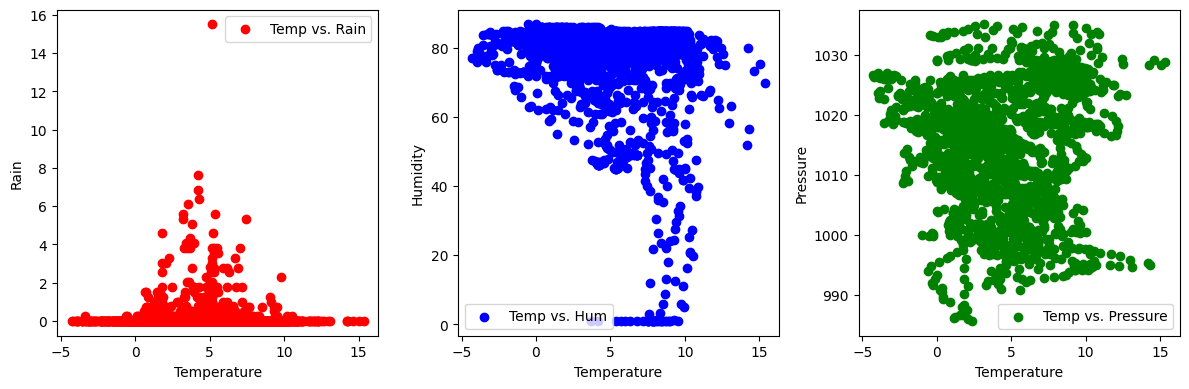

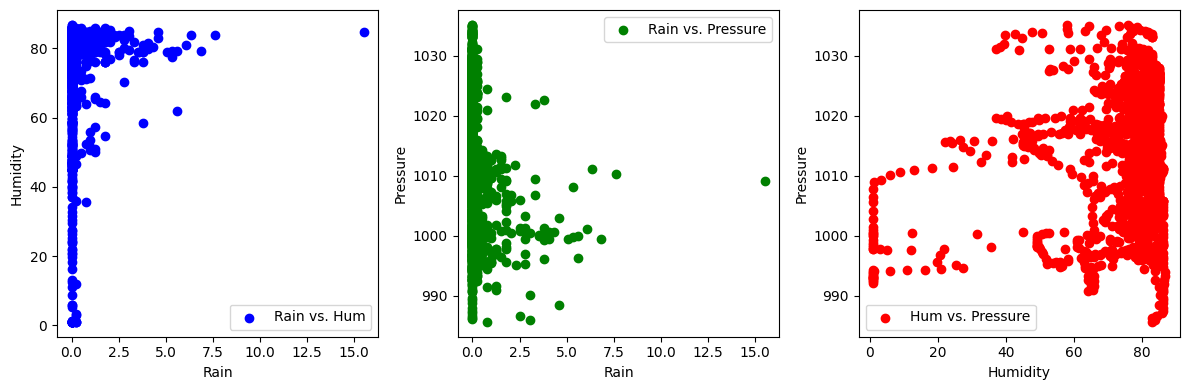

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[1].scatter(combined_hourly_data['temp'], combined_hourly_data['hum'], label='Temp vs. Hum', color='Blue')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Humidity')
axes[1].legend()

axes[0].scatter(combined_hourly_data['temp'], combined_hourly_data['rain'], label='Temp vs. Rain', color='Red')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Rain')
axes[0].legend()

axes[2].scatter(combined_hourly_data['temp'], combined_hourly_data['bar'], label='Temp vs. Pressure', color='Green')
axes[2].set_xlabel('Temperature')
axes[2].set_ylabel('Pressure')
axes[2].legend()

#prevent overlap
plt.tight_layout()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(combined_hourly_data['rain'], combined_hourly_data['hum'], label='Rain vs. Hum', color='Blue')
axes[0].set_xlabel('Rain')
axes[0].set_ylabel('Humidity')
axes[0].legend()

axes[2].scatter(combined_hourly_data['hum'], combined_hourly_data['bar'], label='Hum vs. Pressure', color='Red')
axes[2].set_xlabel('Humidity')
axes[2].set_ylabel('Pressure')
axes[2].legend()

axes[1].scatter(combined_hourly_data['rain'], combined_hourly_data['bar'], label='Rain vs. Pressure', color='Green')
axes[1].set_xlabel('Rain')
axes[1].set_ylabel('Pressure')
axes[1].legend()

#prevent overlap
plt.tight_layout()

plt.show()


The **first scatterplot** shows a cluster of points along the bottom, with **no apparent trend**. This is **consistent with the correlation coefficient** of -0.00869344, indicating a **very weak/no negative linear relationship**.

In the **second scatterplot**, there is a visible **downward trend** as temperature increases, humidity appears to decrease. This **aligns with the negative correlation coefficient** of -0.27077485, suggesting a **weak to moderate negative linear relationship**.

The **third plot** shows a **slight upward trend**. This is in line with the **positive correlation coefficient** of 0.06812903, indicating a very **weak positive linear** relationship.

The **fourth points** here are largely horizontal with a very subtle **upward trend**. This corresponds to the positive correlation coefficient of 0.03968233, indicating a very **weak positive linear relationship**.

This **fifth scatterplot** has points that are widely scattered, with a **slight visible downward trend, which is consistent with the negative correlation coefficient** of -0.22753189, suggesting a weak negative linear relationship.

The **last scatterplot** shows a somewhat scattered but **visible upward trend**, which aligns with the **positive correlation** coefficient of 0.20237338, suggesting a **weak positive linear relationship**.

**Line Plot:**

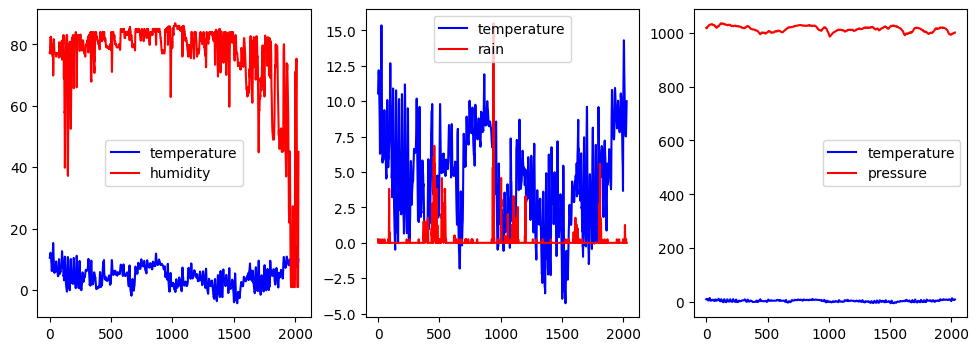

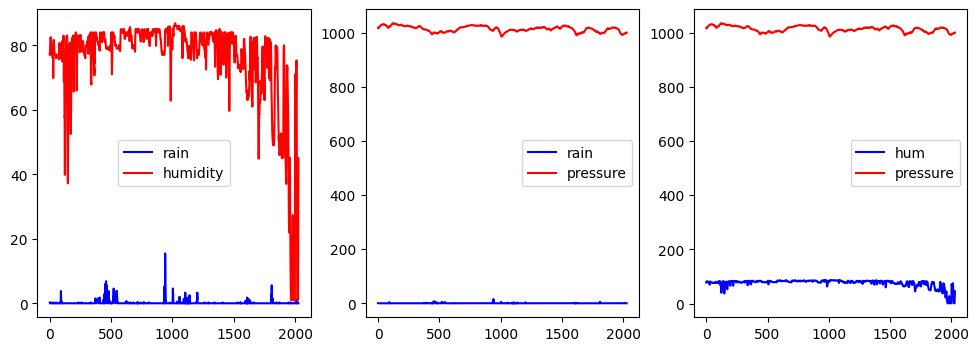

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].plot(combined_hourly_data['temp'], label='temperature', color='Blue')
axes[0].plot(combined_hourly_data['hum'], label='humidity',color='Red')
axes[0].legend()

axes[1].plot(combined_hourly_data['temp'], label='temperature', color='Blue')
axes[1].plot(combined_hourly_data['rain'], label='rain',color='Red')
axes[1].legend()

axes[2].plot(combined_hourly_data['temp'], label='temperature', color='Blue')
axes[2].plot(combined_hourly_data['bar'], label='pressure',color='Red')
axes[2].legend()

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].plot(combined_hourly_data['rain'], label='rain', color='Blue')
axes[0].plot(combined_hourly_data['hum'], label='humidity',color='Red')
axes[0].legend()

axes[2].plot(combined_hourly_data['hum'], label='hum', color='Blue')
axes[2].plot(combined_hourly_data['bar'], label='pressure',color='Red')
axes[2].legend()

axes[1].plot(combined_hourly_data['rain'], label='rain', color='Blue')
axes[1].plot(combined_hourly_data['bar'], label='pressure',color='Red')
axes[1].legend()

From the **above plot** we can say that they are **agreeing the analysis of correlation between the variables**.

###RSSI AND SNR

As of now we have **analysed for temperature, rain, humidity and pressure**. So, lets dive into the details of **RSSI values** and the **SNR** corresponding to it. Again we are going to **look for correlation** but this tie we are going to use a loop that will change the **RSSI values and the corresponding SNR value** based on the available nodes(which is 8). Here also we will consider the *np.corrcoef()* function, another point to note is we are **using .T** which will **transpose the array** as we are **passing it as 2D array to input the correct shape we are doing this**. Transposing a matrix means swapping its rows and columns.

In [ ]:
rssi=['RSSI_01', 'RSSI_02', 'RSSI_03', 'RSSI_04', 'RSSI_05', 'RSSI_06', 'RSSI_07', 'RSSI_08']
snr=['SNR_01', 'SNR_02', 'SNR_03', 'SNR_04', 'SNR_05', 'SNR_06', 'SNR_07', 'SNR_08']

for i in range(0,8):
  RSSI=combined_hourly_data[rssi[i]].values
  SNR=combined_hourly_data[snr[i]].values
  corr_matrix=np.corrcoef(RSSI.T, SNR.T)
  print(f"\n Correlation {i+1}:\n {corr_matrix}")


 Correlation 1:
 [[1.         0.10052065]
 [0.10052065 1.        ]]

 Correlation 2:
 [[1.         0.36325462]
 [0.36325462 1.        ]]

 Correlation 3:
 [[nan nan]
 [nan nan]]

 Correlation 4:
 [[nan nan]
 [nan nan]]

 Correlation 5:
 [[nan nan]
 [nan nan]]

 Correlation 6:
 [[nan nan]
 [nan nan]]

 Correlation 7:
 [[ 1.         -0.18586739]
 [-0.18586739  1.        ]]

 Correlation 8:
 [[nan nan]
 [nan nan]]


Out of 8 data we got analysis for **3 of them showing us some correlation**. They are:
1. *RSSI_01 vs SNR_01:* in which we attained the **value of 0.10052065** which is a **positive linear relation** between the values of the two. However the correlation is **very weak as it is close to 0**.

2. *RSSI_02 vs SNR_02:* we achieved a value of **0.36325462 pretty higher than the first one** and this also showed a **positive linear relation** of values btwn the two. However the **correlation is quite strong compared to the previous one**.

3. RSSI_07 vs SNR_07: for this we have a **value of -0.18586739** which is showing **negative linear relation** of values btwn the two variables. However, the **correlation is very weak** and **with negative it indicates that with increase in one value other value decreases**(other variable) and **with decreasing value the other variable's value increases**.

4. Rest all are **displaying NaN**, this typically happens when **there is no variation or very limited variation** in one or both of the variables being compared.

For **enhanced data visualization**, we have implemented **plotting** using the *matplotlib.pyplot* library. This versatile library allows us to create a variety of graphs, and it also supports the creation of subplots for a more comprehensive view of the data.

**Scatter Plot:**

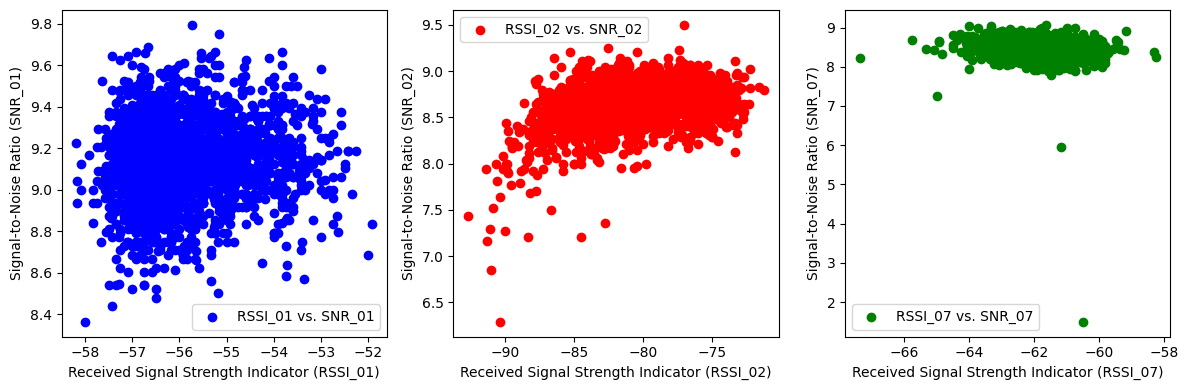

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(combined_hourly_data['RSSI_01'], combined_hourly_data['SNR_01'], label='RSSI_01 vs. SNR_01', color='Blue')
axes[0].set_xlabel('Received Signal Strength Indicator (RSSI_01)')
axes[0].set_ylabel('Signal-to-Noise Ratio (SNR_01)')
axes[0].legend()

axes[1].scatter(combined_hourly_data['RSSI_02'], combined_hourly_data['SNR_02'], label='RSSI_02 vs. SNR_02', color='Red')
axes[1].set_xlabel('Received Signal Strength Indicator (RSSI_02)')
axes[1].set_ylabel('Signal-to-Noise Ratio (SNR_02)')
axes[1].legend()

axes[2].scatter(combined_hourly_data['RSSI_07'], combined_hourly_data['SNR_07'], label='RSSI_07 vs. SNR_07', color='Green')
axes[2].set_xlabel('Received Signal Strength Indicator (RSSI_07)')
axes[2].set_ylabel('Signal-to-Noise Ratio (SNR_07)')
axes[2].legend()

#prevent overlap
plt.tight_layout()

plt.show()


For the **first graph** this is consistent with what we see in the scatter plot where there is a **very slight upward trend**, but the **points are largely scattered**.

For the **second plot** it is visible in the scatter plot as there is a more **noticeable upward trend in the data points** compared to the first plot, **although there is still a significant amount of scatter**.

In the **last scatter plot**, we can see a **slight downward trend** in the points, which aligns with the **negative correlation value**.


**Line Plot:**

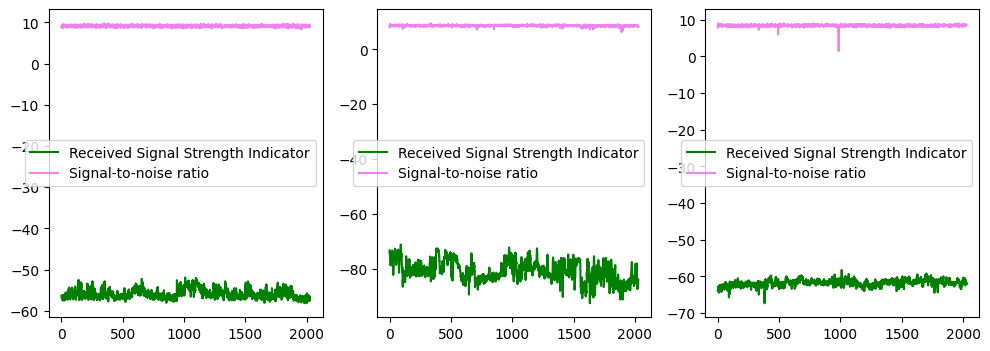

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].plot(combined_hourly_data['RSSI_01'], label='Received Signal Strength Indicator', color='Green')
axes[0].plot(combined_hourly_data['SNR_01'], label='Signal-to-noise ratio',color='Violet')
axes[0].legend()

axes[1].plot(combined_hourly_data['RSSI_02'], label='Received Signal Strength Indicator', color='Green')
axes[1].plot(combined_hourly_data['SNR_02'], label='Signal-to-noise ratio',color='Violet')
axes[1].legend()

axes[2].plot(combined_hourly_data['RSSI_07'], label='Received Signal Strength Indicator', color='Green')
axes[2].plot(combined_hourly_data['SNR_07'], label='Signal-to-noise ratio',color='Violet')
axes[2].legend()

The above code shows **whether our analysis is giving the expected result or not** so now to get a better view of the plot **we plot the graph for the range of values which gives us a closer analysis**.

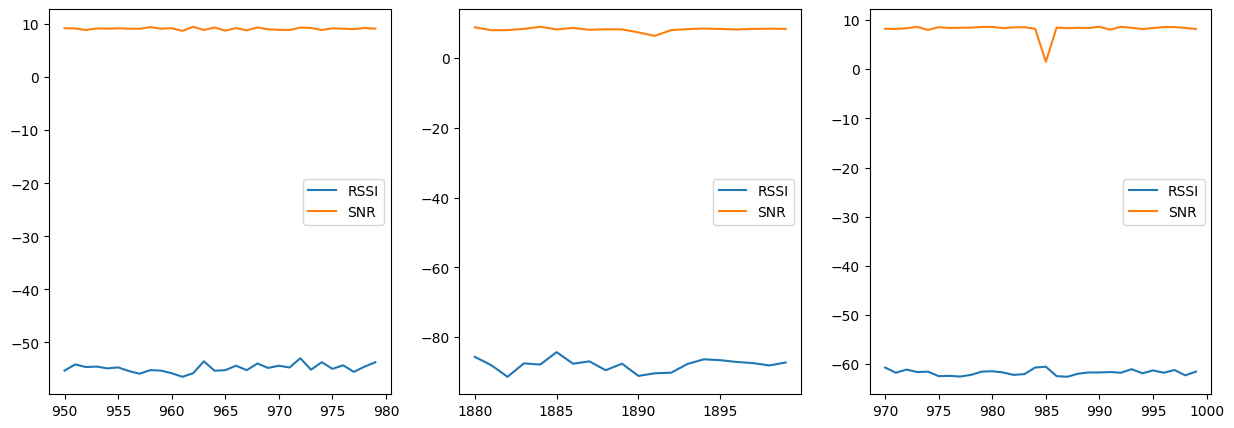

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

RSSI_07_head=combined_hourly_data['RSSI_07'].iloc[970:1000]
SNR_07_head=combined_hourly_data['SNR_07'].iloc[970:1000]
axes[2].plot(RSSI_07_head, label='RSSI')
axes[2].plot(SNR_07_head, label='SNR')
axes[2].legend()

RSSI_02_head=combined_hourly_data['RSSI_02'].iloc[1880:1900]
SNR_02_head=combined_hourly_data['SNR_02'].iloc[1880:1900]
axes[1].plot(RSSI_02_head, label='RSSI')
axes[1].plot(SNR_02_head, label='SNR')
axes[1].legend()

RSSI_01_head=combined_hourly_data['RSSI_01'].iloc[950:980]
SNR_01_head=combined_hourly_data['SNR_01'].iloc[950:980]
axes[0].plot(RSSI_01_head, label='RSSI')
axes[0].plot(SNR_01_head, label='SNR')
axes[0].legend()

As we discussedd earlier, for the above graph here is the final analysis that we can visualise.

1. *RSSI_01 vs SNR_01:* which is a **positive linear relation** between the values of the two. However the **correlation** is **very weak** as the value is very close to 0. Eventhough we know the influence of the value between the two is **very weak still it shows a very little sight of linearity** and we can visualise that. **With increase in one value over the other value(other variable) increases and with decreasing value the value increases**.

2. *RSSI_02 vs SNR_02:* which is a **positive linear relation** between the values of the two. However the c**orrelation is much stronger than the first**. We can witness the influence of the value between the two variable is much stronger than the previous one. A **healthy sight of linearity we can visualise**. With increase in one value over the other value(other variable) increases and with decreasing value the value increases.

3. *RSSI_07 vs SNR_07:* as discussed earlier as it is **showing negative linear relation** of values btwn the two variables. However, the **correlation is very weak** and with negative it indicates that with **increase in one value other value decreases(other variable) and with decreasing value the other variable's value increases**.


###RSSI AND ENVIRONMENTAL CONDITION:


As of now we considered only the part of **comparison of the environmental condition to the other environmental varibles and on the next we compared the RSSI and SNR**. In this section we will consider the **analysis** that can be drawn from **combination the environmental condition with the signal strenth**. This analysis aims to offer a thorough comprehension of the substantial **impact of environmental conditions on signal characteristics**.
First we can do the comparison individually or by means of taking the arregated RSSI value by using *mean()* function.

In [ ]:
combined_hourly_data_RSSI=combined_hourly_data
combined_hourly_data_RSSI['total RSSI']=combined_hourly_data_RSSI[['RSSI_01', 'RSSI_02', 'RSSI_03', 'RSSI_04', 'RSSI_05', 'RSSI_06', 'RSSI_07', 'RSSI_08']].mean(axis=1)
combined_hourly_data_RSSI

,timestamp,temp,hum,bar,rain,RSSI_01,RSSI_02,RSSI_03,RSSI_04,RSSI_05,...,RSSI_08,SNR_01,SNR_02,SNR_03,SNR_04,SNR_05,SNR_06,SNR_07,SNR_08,total RSSI
0,1605520800,10.550000,77.333333,1018.083333,0.25,-56.333333,-73.333333,-67.166667,-76.200000,-71.666667,...,NaN,8.875000,8.125000,8.041667,8.350000,8.458333,8.541667,7.950000,NaN,-67.361905
1,1605524400,10.716667,77.000000,1017.416667,0.00,-56.700000,-74.416667,-68.250000,-77.833333,-71.833333,...,NaN,8.900000,8.979167,8.770833,8.875000,8.937500,9.125000,9.041667,NaN,-68.028571
2,1605528000,11.216667,77.666667,1016.933333,0.00,-56.750000,-73.916667,-67.416667,-77.583333,-72.083333,...,NaN,9.104167,8.541667,8.354167,8.854167,8.479167,8.729167,8.500000,NaN,-67.738095
3,1605531600,11.700000,80.500000,1016.450000,0.00,-56.916667,-75.750000,-67.750000,-77.416667,-71.916667,...,NaN,9.000000,8.791667,8.729167,8.770833,8.812500,8.875000,8.791667,NaN,-68.178571
4,1605535200,12.016667,81.666667,1016.616667,0.00,-57.000000,-75.818182,-67.454545,-79.166667,-73.000000,...,NaN,9.145833,8.659091,8.431818,8.437500,8.625000,8.795455,8.068182,NaN,-68.231602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,1612861200,8.483333,1.000000,1000.150000,0.00,-56.833333,-87.083333,-67.833333,-78.250000,-69.833333,...,-89.416667,9.166667,8.354167,8.437500,8.812500,8.645833,8.863636,8.416667,8.354167,-71.621212
2025,1612864800,8.983333,1.000000,1000.433333,0.00,-57.500000,-86.916667,-68.916667,-78.750000,-71.083333,...,-89.000000,8.812500,8.604167,8.854167,8.625000,9.145833,8.645833,8.625000,7.954545,-72.093750
2026,1612868400,9.350000,12.500000,1000.533333,0.00,-56.500000,-86.916667,-67.750000,-78.083333,-72.583333,...,-90.750000,9.083333,8.250000,8.625000,8.791667,8.666667,8.729167,8.613636,7.500000,-72.105114
2027,1612872000,9.616667,31.500000,1000.300000,0.00,-57.083333,-85.500000,-68.333333,-78.916667,-72.583333,...,-89.083333,9.125000,8.479167,8.833333,8.416667,9.145833,8.750000,8.604167,7.958333,-72.000000


Here we are considering the function *np.corrcoef* provided by NumPy library and this gives the corrrelation between two variables. For example: *np.corrcoef(varible1, variable2)*.


In [ ]:
corr_RSSI_1=np.corrcoef(combined_hourly_data_RSSI.temp,combined_hourly_data_RSSI['total RSSI'])
print("Correlation between temperature and total RSSI\n",corr_RSSI_1)
print("\n")

corr_RSSI_2=np.corrcoef(combined_hourly_data_RSSI.bar,combined_hourly_data_RSSI['total RSSI'])
print("Correlation between pressure and total RSSI\n",corr_RSSI_2)
print("\n")

corr_RSSI_3=np.corrcoef(combined_hourly_data_RSSI.rain,combined_hourly_data_RSSI['total RSSI'])
print("Correlation between rain and total RSSI\n",corr_RSSI_3)
print("\n")

corr_RSSI_3=np.corrcoef(combined_hourly_data_RSSI.hum,combined_hourly_data_RSSI['total RSSI'])
print("Correlation between humidity and total RSSI\n",corr_RSSI_3)

Correlation between temperature and total RSSI
 [[ 1.         -0.38118612]
 [-0.38118612  1.        ]]


Correlation between pressure and total RSSI
 [[1.         0.18798704]
 [0.18798704 1.        ]]


Correlation between rain and total RSSI
 [[1.         0.13809955]
 [0.13809955 1.        ]]


Correlation between humidity and total RSSI
 [[1.         0.29612941]
 [0.29612941 1.        ]]


1. *Temperature and Total RSSI:* The **correlation coefficient of -0.3812** suggests a **moderate negative linear relationship** between temperature and total RSSI. As **temperature decreases, there is a tendency for the total RSSI to increase**.

2. *Pressure and Total RSSI:* With a **correlation coefficient of 0.1880**, there is a **weak positive linear relation** between pressure and total RSSI. However, the correlation is not very strong.

3. *Rain and Total RSSI:* A **correlation coefficient of 0.1381** indicates a **weak positive linear relationship** between rain and total RSSI. While there is a connection, it is not highly pronounced.

4. *Humidity and Total RSSI:* The **correlation coefficient of 0.2961** suggests a **moderate positive linear relationship** between humidity and total RSSI. As humidity increases, there is a tendency for the total RSSI to also increase.

For enhanced data visualization, we have implemented plotting using the *matplotlib.pyplot* library. This versatile library allows us to create a variety of graphs, and it also supports the creation of subplots for a more comprehensive view of the data.

**Scatter Plot:**

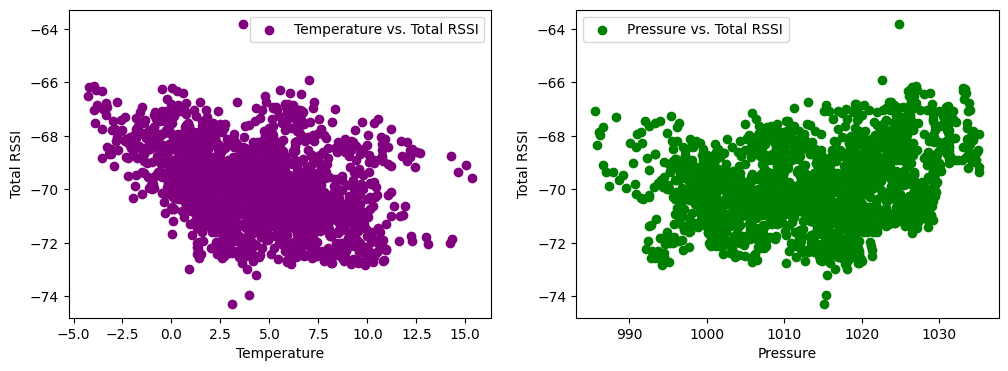

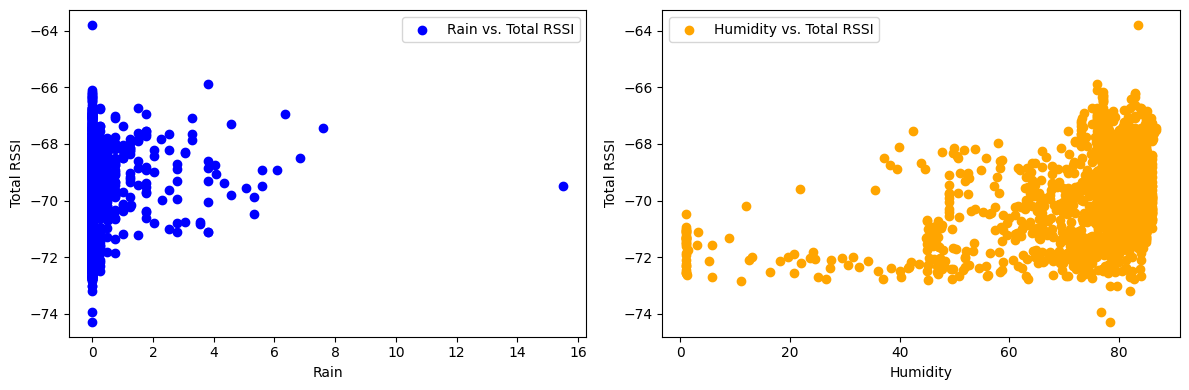

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Scatter plot for temperature vs. total RSSI
axes[0].scatter(combined_hourly_data_RSSI['temp'], combined_hourly_data_RSSI['total RSSI'], label='Temperature vs. Total RSSI', color='Purple')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Total RSSI')
axes[0].legend()

axes[1].scatter(combined_hourly_data_RSSI['bar'], combined_hourly_data_RSSI['total RSSI'], label='Pressure vs. Total RSSI', color='Green')
axes[1].set_xlabel('Pressure')
axes[1].set_ylabel('Total RSSI')
axes[1].legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(combined_hourly_data_RSSI['rain'], combined_hourly_data_RSSI['total RSSI'], label='Rain vs. Total RSSI', color='Blue')
axes[0].set_xlabel('Rain')
axes[0].set_ylabel('Total RSSI')
axes[0].legend()

axes[1].scatter(combined_hourly_data_RSSI['hum'], combined_hourly_data_RSSI['total RSSI'], label='Humidity vs. Total RSSI', color='Orange')
axes[1].set_xlabel('Humidity')
axes[1].set_ylabel('Total RSSI')
axes[1].legend()

plt.tight_layout()

plt.show()


The **first scatterplot** shows a broad distribution of points with a **visible downward trend**. This is **consistent with the negative correlation** coefficient with a **moderate negative linear relationship**.

In **second scatterplot**, the points are widely scattered with a **very slight upward trend**. This aligns with the **positive correlation** coefficient of 0.18798704, suggesting a **weak positive linear** relationship.

The **third plot** shows points that are somewhat scattered, with a **subtle upward trend**. This is in line with the **positive correlatio**n coefficient of 0.13809955, indicating a **weak positive linear** relationship.

The **last scatterplot** has a large scatter of points with a more noticeable **upward trend** compared to the earlier plots. This corresponds to the **positive correlation** coefficient of 0.29612941, indicating a weak to **moderate positive linear**.

**Line Plot**

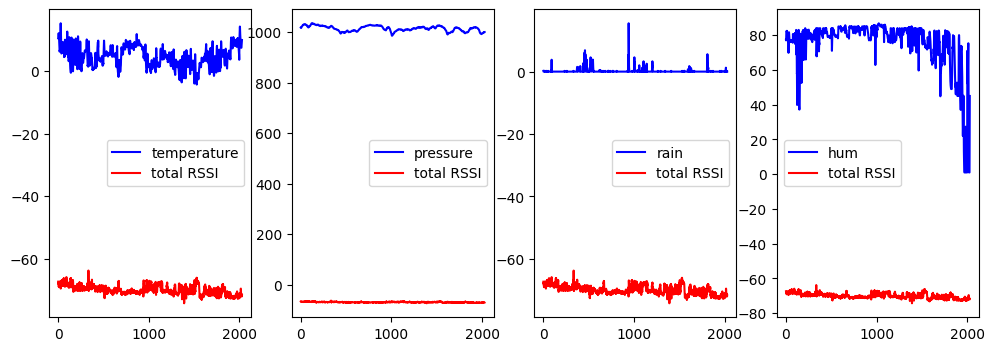

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].plot(combined_hourly_data_RSSI['temp'], label='temperature', color='Blue')
axes[0].plot(combined_hourly_data_RSSI['total RSSI'], label='total RSSI',color='Red')
axes[0].legend()

axes[1].plot(combined_hourly_data_RSSI['bar'], label='pressure', color='Blue')
axes[1].plot(combined_hourly_data_RSSI['total RSSI'], label='total RSSI',color='Red')
axes[1].legend()

axes[2].plot(combined_hourly_data_RSSI['rain'], label='rain', color='Blue')
axes[2].plot(combined_hourly_data_RSSI['total RSSI'], label='total RSSI',color='Red')
axes[2].legend()

axes[3].plot(combined_hourly_data_RSSI['hum'], label='hum', color='Blue')
axes[3].plot(combined_hourly_data_RSSI['total RSSI'], label='total RSSI',color='Red')
axes[3].legend()

From the above plot we can say that they are agreeing the analysis of correlation between the variables.

###SNR AND ENVIRONMENTAL CONDITION:
First we can do the comparison individually or by means of taking the arregated SNR value by using *mean()* function.

In [ ]:
combined_hourly_data_SNR=combined_hourly_data
combined_hourly_data_SNR['total SNR']=combined_hourly_data_RSSI[['SNR_01', 'SNR_02', 'SNR_03', 'SNR_04', 'SNR_05', 'SNR_06', 'SNR_07', 'SNR_08']].mean(axis=1)
combined_hourly_data_SNR

,timestamp,temp,hum,bar,rain,RSSI_01,RSSI_02,RSSI_03,RSSI_04,RSSI_05,...,SNR_01,SNR_02,SNR_03,SNR_04,SNR_05,SNR_06,SNR_07,SNR_08,total RSSI,total SNR
0,1605520800,10.550000,77.333333,1018.083333,0.25,-56.333333,-73.333333,-67.166667,-76.200000,-71.666667,...,8.875000,8.125000,8.041667,8.350000,8.458333,8.541667,7.950000,NaN,-67.361905,8.334524
1,1605524400,10.716667,77.000000,1017.416667,0.00,-56.700000,-74.416667,-68.250000,-77.833333,-71.833333,...,8.900000,8.979167,8.770833,8.875000,8.937500,9.125000,9.041667,NaN,-68.028571,8.947024
2,1605528000,11.216667,77.666667,1016.933333,0.00,-56.750000,-73.916667,-67.416667,-77.583333,-72.083333,...,9.104167,8.541667,8.354167,8.854167,8.479167,8.729167,8.500000,NaN,-67.738095,8.651786
3,1605531600,11.700000,80.500000,1016.450000,0.00,-56.916667,-75.750000,-67.750000,-77.416667,-71.916667,...,9.000000,8.791667,8.729167,8.770833,8.812500,8.875000,8.791667,NaN,-68.178571,8.824405
4,1605535200,12.016667,81.666667,1016.616667,0.00,-57.000000,-75.818182,-67.454545,-79.166667,-73.000000,...,9.145833,8.659091,8.431818,8.437500,8.625000,8.795455,8.068182,NaN,-68.231602,8.594697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,1612861200,8.483333,1.000000,1000.150000,0.00,-56.833333,-87.083333,-67.833333,-78.250000,-69.833333,...,9.166667,8.354167,8.437500,8.812500,8.645833,8.863636,8.416667,8.354167,-71.621212,8.631392
2025,1612864800,8.983333,1.000000,1000.433333,0.00,-57.500000,-86.916667,-68.916667,-78.750000,-71.083333,...,8.812500,8.604167,8.854167,8.625000,9.145833,8.645833,8.625000,7.954545,-72.093750,8.658381
2026,1612868400,9.350000,12.500000,1000.533333,0.00,-56.500000,-86.916667,-67.750000,-78.083333,-72.583333,...,9.083333,8.250000,8.625000,8.791667,8.666667,8.729167,8.613636,7.500000,-72.105114,8.532434
2027,1612872000,9.616667,31.500000,1000.300000,0.00,-57.083333,-85.500000,-68.333333,-78.916667,-72.583333,...,9.125000,8.479167,8.833333,8.416667,9.145833,8.750000,8.604167,7.958333,-72.000000,8.664062


Here we are considering the function *np.corrcoef* provided by NumPy library and this gives the corrrelation between two variables. For example: *np.corrcoef(varible1, variable2)*.


In [ ]:
corr_SNR_1=np.corrcoef(combined_hourly_data_SNR.temp,combined_hourly_data_SNR['total SNR'])
print("Correlation between temperature and total SNR\n",corr_SNR_1)
print("\n")

corr_SNR_2=np.corrcoef(combined_hourly_data_SNR.bar,combined_hourly_data_SNR['total SNR'])
print("Correlation between pressure and total SNR\n",corr_SNR_2)
print("\n")

corr_SNR_3=np.corrcoef(combined_hourly_data_SNR.rain,combined_hourly_data_SNR['total SNR'])
print("Correlation between rain and total SNR\n",corr_SNR_3)
print("\n")

corr_SNR_3=np.corrcoef(combined_hourly_data_SNR.hum,combined_hourly_data_SNR['total SNR'])
print("Correlation between humidity and total SNR\n",corr_SNR_3)

Correlation between temperature and total SNR
 [[1.       0.097948]
 [0.097948 1.      ]]


Correlation between pressure and total SNR
 [[1.         0.09985066]
 [0.09985066 1.        ]]


Correlation between rain and total SNR
 [[1.         0.03285052]
 [0.03285052 1.        ]]


Correlation between humidity and total SNR
 [[1.         0.11175285]
 [0.11175285 1.        ]]


1. *Temperature and Total SNR:* The **correlation coefficient** of 0.0979 indicates a **weak positive linear relationship** between temperature and the total Signal-to-Noise Ratio. While there is a slight association, it suggests that **temperature changes have a limited impact on the total SNR**.

2. *Pressure and Total SNR:* With a **correlation coefficient** of 0.0999, there is a **weak positive linear relationship** between atmospheric pressure and the total SNR. This suggests a **subtle influence of pressure on the overall Signal-to-Noise Ratio**.

3. *Rain and Total SNR:* The **correlation coefficient** of 0.0329 suggests a **weak positive linear relationship** between rain and the total SNR. However, this association is minimal, indicating that **rain has a limited impact on the overall Signal-to-Noise Ratio**.

4. *Humidity and Total SNR:* A correlation coefficient of 0.1118 indicates a **weak positive linear relationship** between humidity and the total SNR. While there is a slight association, it suggests that **humidity changes have a limited impact on the total Signal-to-Noise Ratio**.

For **enhanced data visualization**, we have implemented plotting using the *matplotlib.pyplot* library. This versatile library allows us to create a variety of graphs, and it also supports the creation of subplots for a more comprehensive view of the data.

**Scatter Plot:**

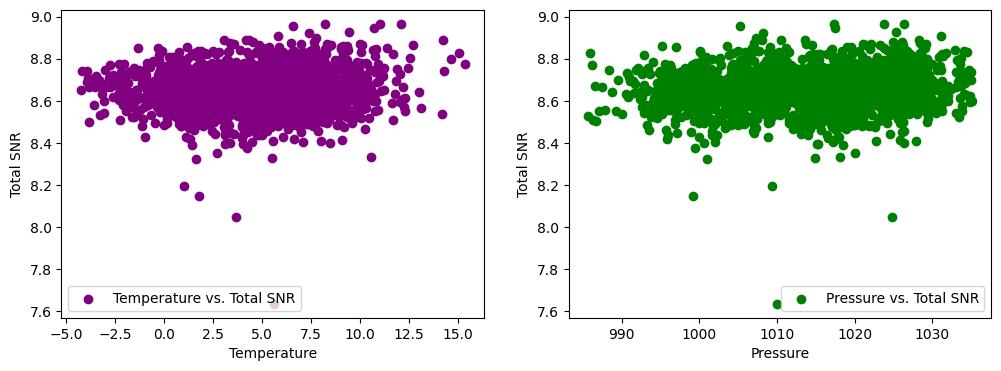

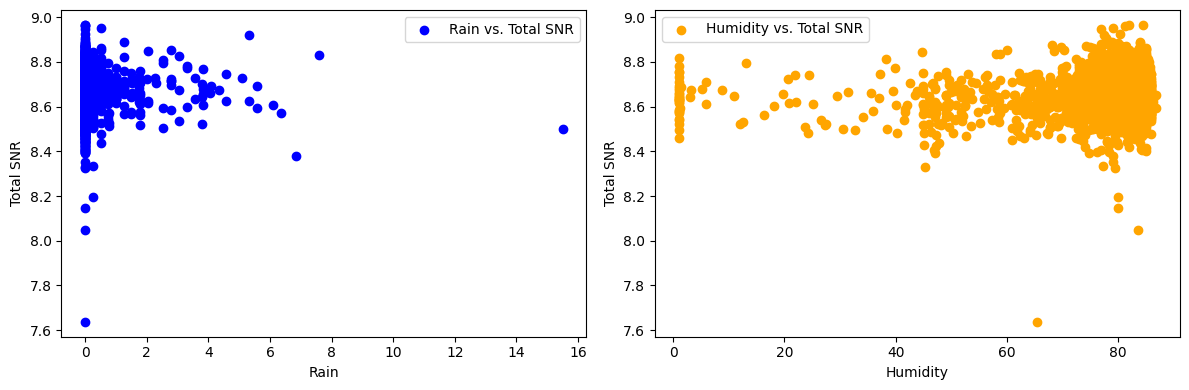

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(combined_hourly_data_SNR['temp'], combined_hourly_data_SNR['total SNR'], label='Temperature vs. Total SNR', color='Purple')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Total SNR')
axes[0].legend()

axes[1].scatter(combined_hourly_data_SNR['bar'], combined_hourly_data_SNR['total SNR'], label='Pressure vs. Total SNR', color='Green')
axes[1].set_xlabel('Pressure')
axes[1].set_ylabel('Total SNR')
axes[1].legend()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(combined_hourly_data_SNR['rain'], combined_hourly_data_SNR['total SNR'], label='Rain vs. Total SNR', color='Blue')
axes[0].set_xlabel('Rain')
axes[0].set_ylabel('Total SNR')
axes[0].legend()

axes[1].scatter(combined_hourly_data_SNR['hum'], combined_hourly_data_SNR['total SNR'], label='Humidity vs. Total SNR', color='Orange')
axes[1].set_xlabel('Humidity')
axes[1].set_ylabel('Total SNR')
axes[1].legend()

plt.tight_layout()

plt.show()


The **first scatterplot** represents the distribution of points that appear to be **mostly horizontal with a very slight upward trend**. This is **consistent with the positive correlation** coefficient of 0.097948, indicating a **very weak positive linear relations**.

This **second scatterplot** also shows a rather **horizontal distribution of points with a minimal upward trend**. This, indicating a **very weak positive linear relations**.

The **third**, coefficient is **very close to zero, indicating a very weak positive linear relationship**, and the scatterplot reflects that the relationship is **not strong** and can appear as a **weak positive trend** due to the scatter of data points.

The **fourth scatterplot** displays **points that are dispersed but with a discernible upward trend**, which **aligns with the positive correlation** coefficient **eventhough the influence is very weak**.

**Line Plot**

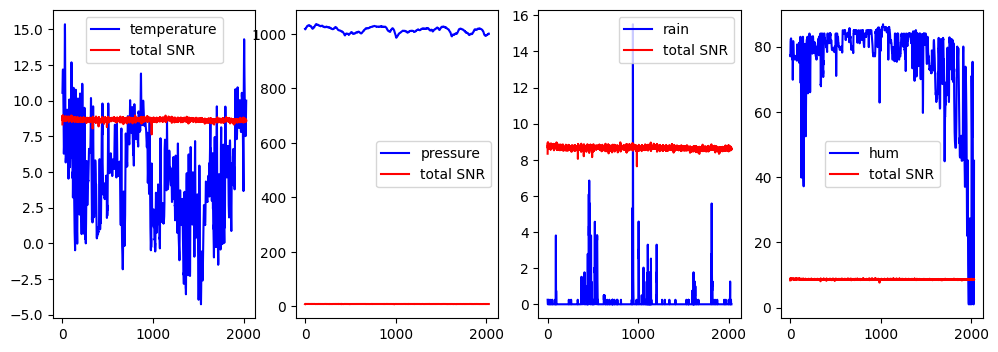

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].plot(combined_hourly_data_SNR['temp'], label='temperature', color='Blue')
axes[0].plot(combined_hourly_data_SNR['total SNR'], label='total SNR',color='Red')
axes[0].legend()

axes[1].plot(combined_hourly_data_SNR['bar'], label='pressure', color='Blue')
axes[1].plot(combined_hourly_data_SNR['total SNR'], label='total SNR',color='Red')
axes[1].legend()

axes[2].plot(combined_hourly_data_SNR['rain'], label='rain', color='Blue')
axes[2].plot(combined_hourly_data_SNR['total SNR'], label='total SNR',color='Red')
axes[2].legend()

axes[3].plot(combined_hourly_data_SNR['hum'], label='hum', color='Blue')
axes[3].plot(combined_hourly_data_SNR['total SNR'], label='total SNR',color='Red')
axes[3].legend()

From the above plot we can say that they are agreeing the analysis of correlation between the variables.


In conclusion, the analysis reveals **subtle relationships between environmental factors and the performance metrics of the LoRaWAN network in the vineyard**.

**Temperature** exhibits a **weak positive association with total Signal-to-Noise Ratio (SNR) and moderate negative with total Received Signal Strength Indicator (RSSI)**.

**Atmospheric pressure** shows a **weak positive correlation** with **total SNR**, and much **better positive correlation with RSSI**.

While **rain has a minimal impact** on both **total SNR and total RSSI**, as indicated by **weak positive correlations**. However, **RSSI is better valued than SNR**.

**Humidity** demonstrates a **weak positive relationship with total SNR and a moderate positive association with total RSSI**.

Eventhough they are **weak** but there is a **relationship between RSSI and temperature which made it almost linear** and also the correlation matrix suggests a linear relationship between RSSI and absolute humidity.

Plots indicate that **LoRa RSSI and meteorological parameters are correlated**, and with our dataset, more research may be profitably done to determine the links between the two.

##HEAT MAP:

###NODE:
This file describes all the **nodes** we have and the distance from the gateway or the **GPS location** of them.

We have columns:

1. *device_ID* which is the identity of the device.
2. *device brand/model* whic decribes the device type and the name of the device we considered for the experiment.
3. *latitude(N):* defines the latitude of the devices where they are placed in.
4. *longitude(E):* defines the longitude of the devices where they are placed in.
5.*gw_distance(m):* it decribes the distance of the device from the gateway.

So our first step will be to decleare the path of the dataset in the drive and load it in resprestation of a data frame which can done by the pd.read_csv().

In [ ]:
coordinate_path='/content/drive/MyDrive/Colab Notebooks/EMM project/nodes_coordinates.csv'
coordinate_data = pd.read_csv(coordinate_path)
coordinate_data

,device ID,device brand/model,latitude (N),longitude(E),gw_distance (m)
0,gateway-01,Mikrotik wAP LR9 kit,44.821957,10.815304,0
1,tinovi-01,Tinovi PM-IO-5-SM,44.822073,10.815746,40
2,tinovi-02,Tinovi PM-IO-5-SM,44.823122,10.816382,16
3,tinovi-03,Tinovi PM-IO-5-SM,44.824571,10.817258,330
4,tinovi-04,Tinovi PM-IO-5-SM,44.823753,10.816942,240
5,tinovi-05,Tinovi PM-IO-5-SM,44.822444,10.816192,90
6,tinovi-06,Tinovi PM-IO-5-SM,44.821973,10.816123,65
7,tinovi-07,Tinovi PM-IO-5-SM,44.822944,10.816703,170
8,tinovi-08,Tinovi PM-IO-5-SM,44.824459,10.817627,340


After that, we'll make a list of lists with coordinates for latitude and longitude in each inner list.

In [ ]:
long_lats=list(map(list,zip(coordinate_data['latitude (N)'],coordinate_data['longitude(E)'], coordinate_data['gw_distance (m)'])))
long_lats

[[44.821957, 10.815304, 0],
 [44.82207340033998, 10.81574565288738, 40],
 [44.82312217506668, 10.81638157790559, 16],
 [44.82457105755545, 10.81725847759737, 330],
 [44.82375277777778, 10.81694166666667, 240],
 [44.82244371876236, 10.81619243363089, 90],
 [44.82197252644758, 10.81612277256111, 65],
 [44.82294444444445, 10.81670277777778, 170],
 [44.82445862158094, 10.8176270471526, 340]]

The HeatMap class is then added to the base folium Map class object, along with the list of lists that we obtained above.

Creates a Folium map object using *folium.Map()* centered at the specified location with an initial zoom level.

*HeatMap(long_lats).add_to(map_object_1):* Creates a HeatMap layer using the latitude and longitude pairs in long_lats and adds it to the map_object_1.

In [ ]:
import folium
from folium.plugins import HeatMap
map_object_1=folium.Map(location=[44.821957, 10.815304], zoomstart=6)
HeatMap(long_lats).add_to(map_object_1)
map_object_1

##CONCLUSION:
For this project we have consider all the **dataset that are provided on the one source platform**. But the major analysis is performed over **combined dataset**. The final conclusion we can draw out is this analytic project provides valuable insights into the interplay **between environmental conditions and LoRaWAN signal metrics**. While some correlations are evident, careful consideration is required, especially in cases where data limitations result in **NaN values**. These findings **contribute to the understanding of environmental influences on signal strength in LoRaWAN networks, offering avenues for further research and potential applications in both academic and industrial domains**. The potential future work that can be implemented using the AI and ML field in terms of predicitng model for **crop field, anomality in vineyard, climate impact assessment, and one can also using GPS coordinates can analyse the staus of each device allocated in different region**.

##BIBLIOGRAPHY:

1. The link to the dataset: https://github.com/emanueleg/lora-rssi/tree/master/vineyard-2021_data

2. The link to the supporting paper: Correlation between weather and signal strength in LoRaWAN networks: An extensive dataset; https://www.sciencedirect.com/science/article/pii/S138912862100517X?via%3Dihub

3. Heatmap link: https://bytescout.com/blog/plotting-geographical-heatmaps-using-python-folium-library.html

4. Numpy: https://numpy.org/

5. Pandas: https://pandas.pydata.org/

6. For plots: https://matplotlib.org/